In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

iris = load_iris()

X = iris.data
y = iris.target
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
type(X)

numpy.ndarray

Epoch 1/20
3/3 [==============================] - 0s 50ms/step - loss: 1.2400 - Accuracy: 0.3958 - val_loss: 1.0724 - val_Accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 0s 9ms/step - loss: 1.3695 - Accuracy: 0.2396 - val_loss: 1.0260 - val_Accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 9ms/step - loss: 1.1848 - Accuracy: 0.3021 - val_loss: 0.9991 - val_Accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 9ms/step - loss: 1.0360 - Accuracy: 0.3958 - val_loss: 0.9724 - val_Accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 9ms/step - loss: 1.1322 - Accuracy: 0.3229 - val_loss: 0.9497 - val_Accuracy: 0.7083
Epoch 6/20
3/3 [==============================] - 0s 10ms/step - loss: 1.1175 - Accuracy: 0.4062 - val_loss: 0.9348 - val_Accuracy: 0.7083
Epoch 7/20
3/3 [==============================] - 0s 9ms/step - loss: 1.0789 - Accuracy: 0.5104 - val_loss: 0.9099 - val_Accuracy: 0.7083
Epoch 8/20
3/3 [================

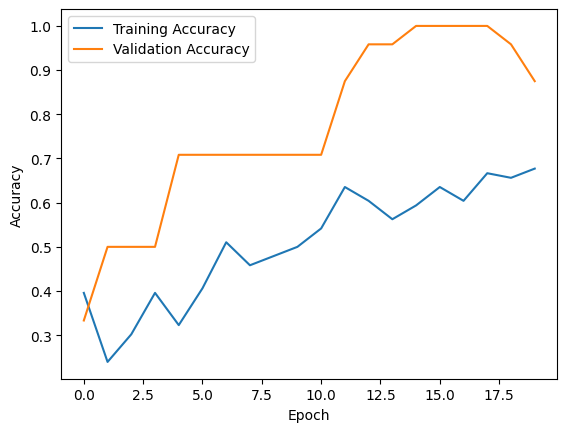

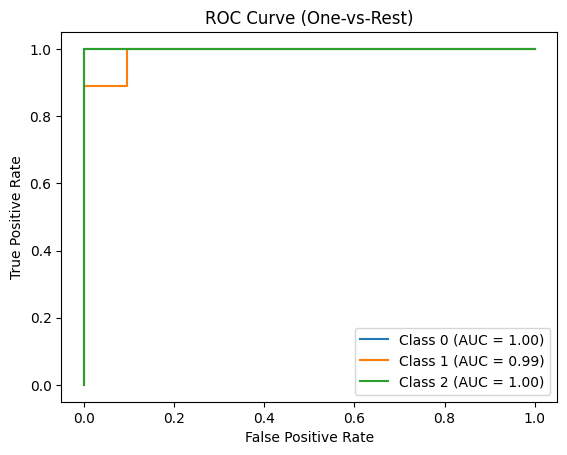

In [93]:
# Define the model (using softmax output)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')  # Output layer with softmax for 3 classes
])

# Compile the model (CategoricalCrossentropy loss and metrics)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Important for multi-class with integer labels
              metrics=['Accuracy'])  # Only Accuracy here if labels are integers

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_probs = model.predict(X_test) # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class labels

# Calculate metrics (using sklearn)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision (macro): {precision}")
print(f"Recall (macro): {recall}")
print(f"F1-score (macro): {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# --- ROC Curve ---
# For multi-class, we'll plot a ROC curve for each class (one-vs-rest)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.plot(history.history['Accuracy'], label='Training Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    
# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

#plt.plot(,, 'k--')  # Diagonal line for random chance
plt.xlim()
plt.ylim()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# --- Other Plots ---
# (You can keep the previous accuracy plot as well)